#### Importing the modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

#### Load the Data

In [2]:
df = pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])

In [3]:
df.shape

(891, 3)

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(714, 3)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
X = df.drop("Survived",axis=1)
y = df["Survived"]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Creating model without Binning

In [9]:
dc = DecisionTreeClassifier()

In [10]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
y_pred = dc.predict(X_test)

In [12]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [13]:
np.mean(cross_val_score(dc,X,y,scoring="accuracy",cv=10))

0.6275039123630672

#### Binning 

In [14]:
kbin_age = KBinsDiscretizer(n_bins=10,encode="ordinal",strategy="quantile")
kbin_fare = KBinsDiscretizer(n_bins=10,encode="ordinal",strategy="quantile")

In [15]:
trf = ColumnTransformer([
    ("first",kbin_age,[0]),
    ("second",kbin_fare,[1])
])

In [16]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [17]:
trf.named_transformers_["first"].n_bins_

array([10])

In [18]:
trf.named_transformers_["first"].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

#### Creating model with Binning

In [19]:
dc = DecisionTreeClassifier()

In [20]:
dc.fit(X_train_trf,y_train)

DecisionTreeClassifier()

In [22]:
y_pred = dc.predict(X_test_trf)

In [23]:
accuracy_score(y_test,y_pred)

0.6223776223776224

In [24]:
np.mean(cross_val_score(dc,X,y,scoring="accuracy",cv=10))

0.6288536776212832

In [25]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6372652582159624


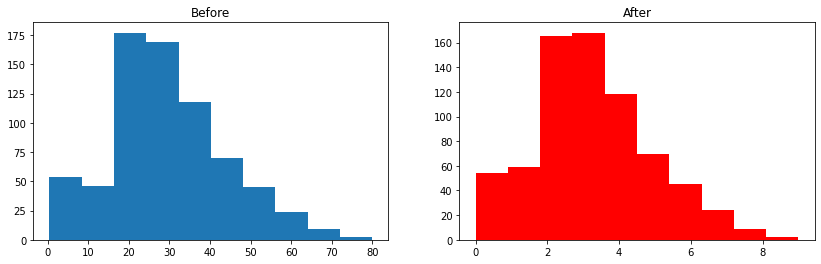

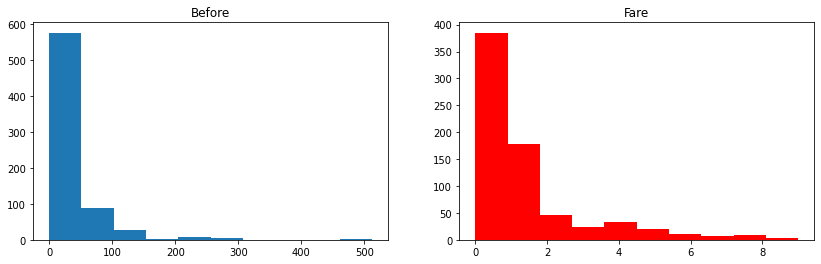

In [26]:
discretize(10,'kmeans')

#### Binarizer

In [27]:
df = pd.read_csv("titanic.csv")[["Age","Fare","SibSp","Parch","Survived"]]

In [29]:
df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [30]:
df.dropna(inplace=True)

In [31]:
df["family"] = df["SibSp"] + df["Parch"]

In [33]:
df.drop(["SibSp","Parch"],axis=1,inplace=True)

In [34]:
df.head()

,Age,Fare,Survived,family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [35]:
X= df.drop("Survived",axis=1)
y = df["Survived"]

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Creating model with Binarizer

In [37]:
dc= DecisionTreeClassifier()

dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred = dc.predict(X_test)
accuracy_score(y_test,y_pred)

0.6223776223776224

In [39]:
np.mean(cross_val_score(dc,X,y,scoring="accuracy",cv=10))

0.6471439749608764

In [40]:
from sklearn.preprocessing import Binarizer

In [41]:
trf = ColumnTransformer([
    ("bin",Binarizer(copy=False),["family"])
],remainder="passthrough")

In [42]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [44]:
pd.DataFrame(X_train_trf,columns=["family","Age","Fare"])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [45]:
dc= DecisionTreeClassifier()

dc.fit(X_train_trf,y_train)

DecisionTreeClassifier()

In [46]:
y_pred = dc.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.6083916083916084

In [47]:
np.mean(cross_val_score(dc,X,y,scoring="accuracy",cv=10))

0.6415492957746479